# Prostate Cancer Analysis


This notebook explores the relationships between various clinical variables and prostate cancer volume using machine learning models.

## Importing Libraries

In [10]:
# Data manipulation
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Loading the Dataset

In [2]:
# dataset information
def dataset_information(dataset):
    
    #size of the dataset
    print(f'\nThe dataframe has {dataset.shape[0]} rows and {dataset.shape[1]} columns\n')
    
    # Count non-null elements in each column
    element_count_per_column = dataset.count()
    
    print("The number of non-null elements in each column is:")
    print(element_count_per_column)

    # Count NaN values per column
    nan_count_per_column = dataset.isna().sum()
    
    # Total NaN values in the dataset
    total_nan_count = dataset.isna().sum().sum()
    
    #data type
    print(f"\nThe data types are:")
    print(f"\n{dataset.dtypes}")
           
    print("\nNaN values per column:")
    print(nan_count_per_column)
    print("\nTotal NaN values in dataset:", total_nan_count)
    
    
    
    return nan_count_per_column, total_nan_count

# model evaluation
def model_evaluation(model_name, y_test, prediction):
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    RSME = np.sqrt(mean_squared_error(y_test, prediction))
    return f'Model {model_name}:\nR²:{r2:.2%}\nRMSE:{RSME:.2f}\nMSE:{mse:.2f}'

## Exploratory Data Analysis (EDA)

### The dataset includes the following variables:

lcavol: The logarithm of cancer volume measured in milliliters (cc). Cancer area was determined from digital images and multiplied by a thickness to calculate the volume.

lweight: The logarithm of prostate weight measured in grams.

age: The age of the patient in years.

lbph: The logarithm of the amount of benign prostatic hyperplasia (BPH), a noncancerous enlargement of the prostate gland, measured as an area in a digitized image and reported in square centimeters.

svi: Seminal vesicle invasion, represented as a 0/1 indicator indicating whether prostate cancer cells have invaded the seminal vesicle.

lcp: The logarithm of capsular penetration, which indicates the extent of cancer spread into the fibrous tissue surrounding the prostate gland, measured as the linear extent of penetration in centimeters.

gleason: The Gleason score, a measure of tumor aggressiveness. The Gleason grading system assigns a grade (1–5) to the two largest areas of cancer in tissue samples. The grades are then summed to obtain the Gleason score.

pgg45: The percentage of Gleason scores that are 4 or 5.

lpsa: The logarithm of prostate-specific antigen (PSA) concentration measured in nanograms per milliliter.

train: This variable serves as an indicator to differentiate observations belonging to the training set from those in the test set.

## The Data

In [3]:
path = "prostate.csv"

# Load dataset
df = pd.read_csv(path)

dataset_information(df)


The dataframe has 97 rows and 10 columns

The number of non-null elements in each column is:
lcavol     97
lweight    97
age        97
lbph       97
svi        97
lcp        97
gleason    97
pgg45      97
lpsa       97
train      97
dtype: int64

The data types are:

lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
train         bool
dtype: object

NaN values per column:
lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

Total NaN values in dataset: 0


(lcavol     0
 lweight    0
 age        0
 lbph       0
 svi        0
 lcp        0
 gleason    0
 pgg45      0
 lpsa       0
 train      0
 dtype: int64,
 0)

## Correlation Coefficients

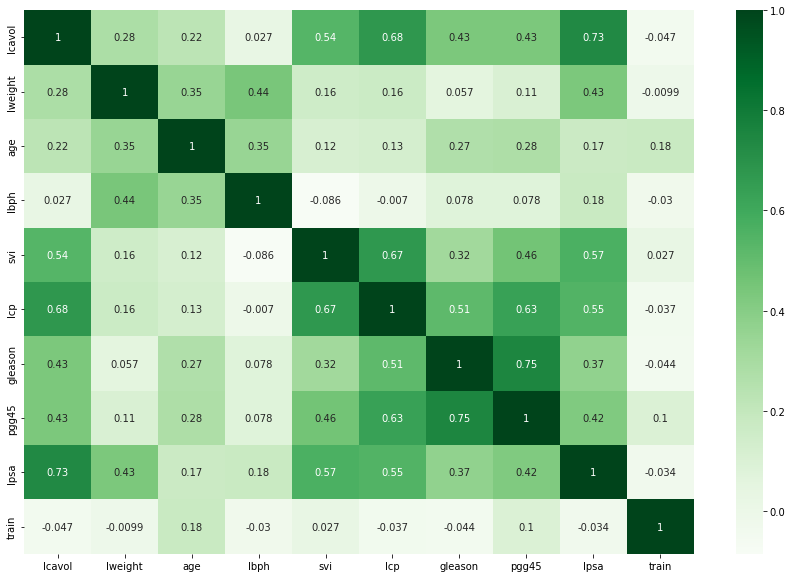

In [4]:
# checking how closely the variables move together.
plt.figure(figsize =(15, 10)) # plot size
sns.heatmap(df.corr(), annot=True, cmap = 'Greens' )#heatmap of correlation coefficients
plt.show()

## Feature Engineering

In [6]:
# Encode categorical variables
df['train'] = df['train'].astype(int)

## Model Building

In [7]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['lpsa'])
y = df['lpsa']

In [8]:
# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
rf_model = RandomForestRegressor()
lr_model = LinearRegression()
et_model = ExtraTreesRegressor()
dt_model = DecisionTreeRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

models = {'RandomForest':rf_model,
          'LinearRegression':lr_model,
          'ExtraTrees':et_model,
           'Decision Tree Regressor':dt_model,
           'Gradient Boosting Regressor':gb_model
          }

In [13]:
for model_name, model in models.items():
    #training
    model.fit(X_train, y_train)
    #testing
    prediction = model.predict(X_test)
    print(model_evaluation(model_name, y_test, prediction))

Model RandomForest:
R²:64.27%
RMSE:0.72
MSE:0.51
Model LinearRegression:
R²:75.19%
RMSE:0.60
MSE:0.36
Model ExtraTrees:
R²:64.94%
RMSE:0.71
MSE:0.50
Model Decision Tree Regressor:
R²:33.90%
RMSE:0.97
MSE:0.95
Model Gradient Boosting Regressor:
R²:31.94%
RMSE:0.99
MSE:0.97


In [16]:
for model_name, model in models.items():
    print(model_name)
    print(model)

RandomForest
RandomForestRegressor()
LinearRegression
LinearRegression()
ExtraTrees
ExtraTreesRegressor()
Decision Tree Regressor
DecisionTreeRegressor(random_state=42)
Gradient Boosting Regressor
GradientBoostingRegressor(random_state=42)


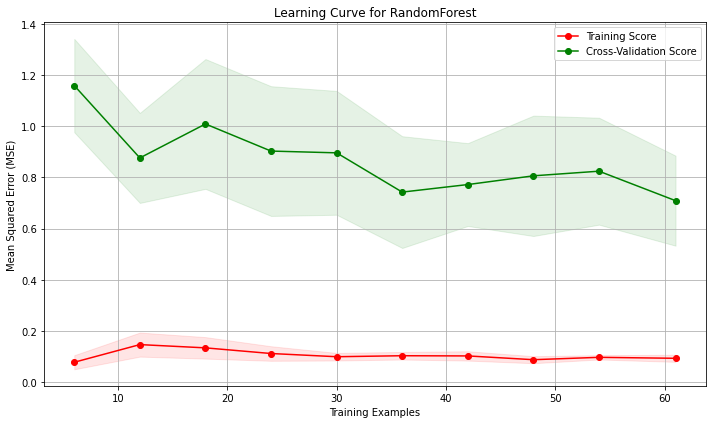

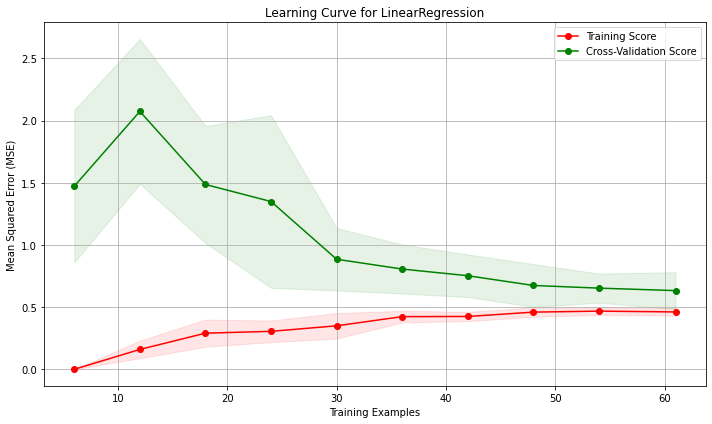

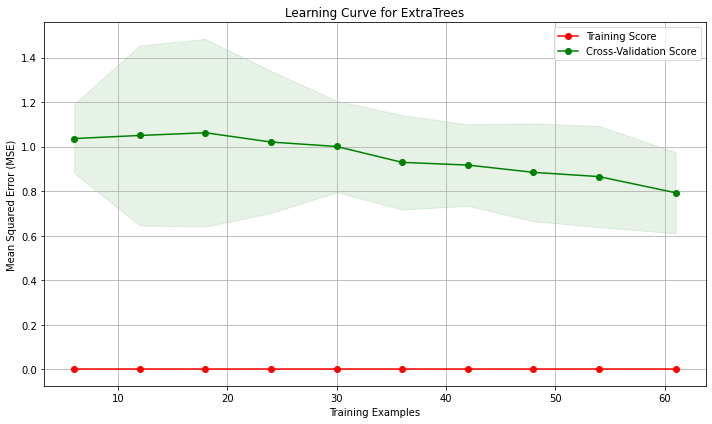

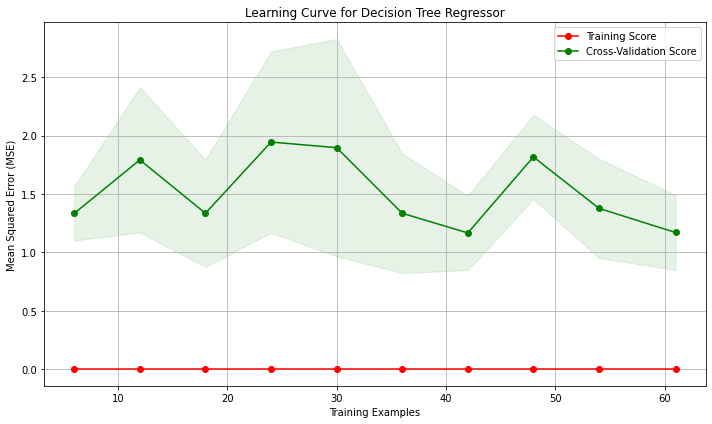

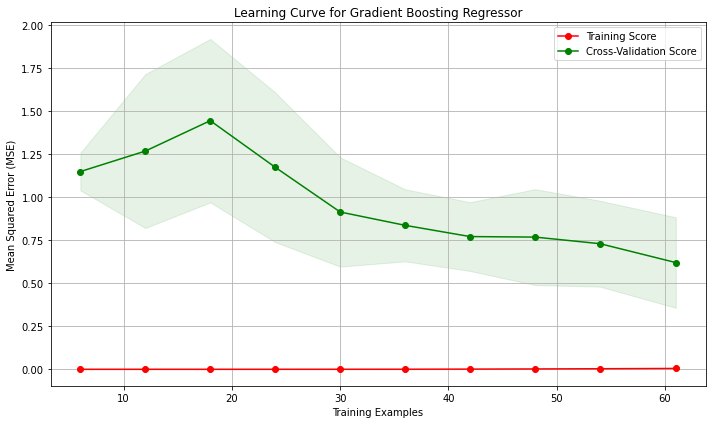

In [17]:
for model_name, model in models.items():
    # Generate the learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.grid()

    # Plot the mean training and test scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

    # Plot the standard deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Add a legend
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

## Model Evaluation

In [14]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree\nMSE: {mse_dt}\nR2: {r2_dt}")

Decision Tree
MSE: 0.9458226899906791
R2: 0.33904649831883515


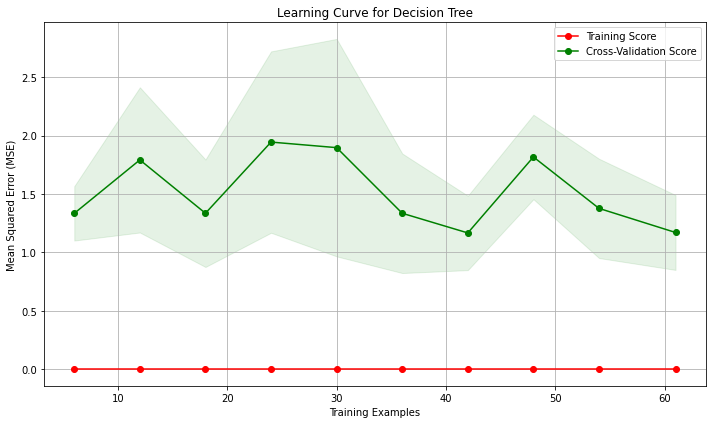

In [15]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Decision Tree")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [16]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest\nMSE: {mse_rf}\nR2: {r2_rf}")

Random Forest
MSE: 0.5389913329568996
R2: 0.623345672858438


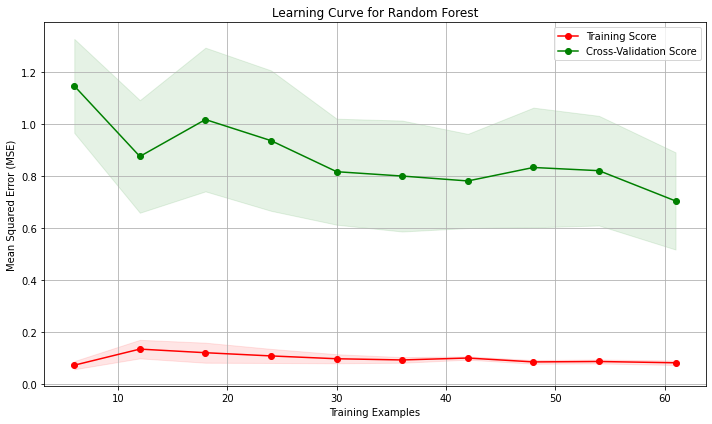

In [18]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid()

# Plot the mean training and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Add a legend
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Conclusion

This project explored the relationship between various clinical variables and the logarithm of prostate-specific antigen (lpsa) levels, which are critical in assessing prostate cancer severity. We applied a variety of machine learning models—including Linear Regression, Decision Tree, Random Forest, Extra Trees, and Gradient Boosting—to predict lpsa based on features such as cancer volume, prostate weight, age, and Gleason score.

Through comprehensive data preprocessing, exploratory data analysis, and the use of standardized modeling techniques, we found that ensemble models like Random Forest and Gradient Boosting provided the most accurate and robust predictions. These models achieved higher R² values and lower mean squared errors, indicating better generalization compared to simpler models like linear regression.

The learning curves further supported these results by showing improved performance with increasing training data and minimal overfitting in ensemble models. This suggests that these models are well-suited for similar medical prediction tasks where capturing non-linear relationships and feature interactions is crucial.

Overall, the study highlights the potential of machine learning in supporting medical decision-making for prostate cancer diagnosis and prognosis, paving the way for more personalized and data-driven healthcare solutions.